In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [33]:
pd.set_option('display.max_columns', None)

In [34]:
df=pd.read_csv("Data/DE&CO_14_06.csv")
df.drop_duplicates(inplace=True)
len(df)

74355

In [35]:
df.drop(columns=['order_id.1','customer_id.1',"product_name_lenght","product_description_lenght","product_photos_qty"],inplace=True)

In [36]:
vazios=df.isnull().sum()
#vazios

Como não falta nenum zip_code_prefix, e faltaa bastante informação da cidade e estado, acredito que faça sentido fazer um drop de ["customer_city","customer_state"], já que essa informação é vazia em diversos casos, mas está contida no zip_code

In [37]:
df.drop(columns=["customer_city","customer_state","seller_city","seller_state"], inplace=True)

In [38]:
vazios=df.isnull().sum()
#vazios

In [39]:
df=df[df["order_approved_at"].notnull()]

In [40]:
#df.loc[df["product_height_cm"].isnull(),["product_height_cm","product_weight_g","product_length_cm","product_width_cm"]]
#type(df.loc[5139,"product_height_cm"])

In [41]:
df=df[df["product_height_cm"].notnull()]
#df.isnull().sum()

In [42]:
#display(df)


In [43]:
#df.info()


In [44]:
df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"]=pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])
#display(df)

In [45]:
#df.info()

In [46]:
df.loc[0,"order_approved_at"]-df.loc[0,"order_purchase_timestamp"]

Timedelta('0 days 00:46:33')

In [47]:
#df[df["order_status"]=="canceled"]

In [48]:
#Criando colunas para analisar o tempo dedicado a cada etapa


PEDIDO_APROVAÇÃO=df["order_approved_at"]-df["order_purchase_timestamp"]
PA2=[]
for elem in PEDIDO_APROVAÇÃO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PA2.append(elem)



SEPARAÇÃO_DO_PEDIDO=df["order_delivered_carrier_date"]-df["order_approved_at"]
SDP2=[]
for elem in SEPARAÇÃO_DO_PEDIDO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    SDP2.append(elem)


PEDIDO_TRANSPORTE=df["order_delivered_customer_date"] - df["order_delivered_carrier_date"]
PT2=[]
for elem in PEDIDO_TRANSPORTE:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PT2.append(elem)

df.insert(4,"Pedido em aprovação",PA2)
df.insert(6,"Separando o pedido",SDP2)
df.insert(8,"Pedido em transporte",PT2)
#df

Analisando um pouco a distribuição de delivery_time

<Axes: xlabel='delivery_time', ylabel='Count'>

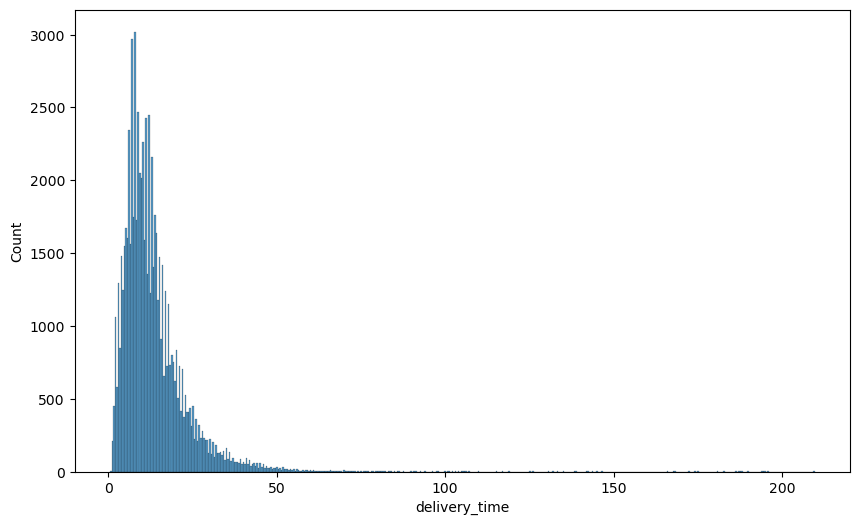

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df["delivery_time"])

In [50]:

df["delivery_time"].describe()

count    74323.000000
mean        13.378747
std          9.707094
min          0.530000
25%          7.270000
50%         11.180000
75%         16.790000
max        209.630000
Name: delivery_time, dtype: float64

In [51]:
def outliers(coluna):
    q1=np.percentile(df[coluna],25)
    q3=np.percentile(df[coluna],75)

    iqr=q3-q1
    out_sup=q3+iqr*1.5
    out_inf=q1-iqr*1.5
    return(out_inf,out_sup)

out_inf,out_sup=outliers("delivery_time")

In [52]:
df=df[df["delivery_time"]<out_sup]
#df

Análise da coluna "Pedido em Aprovação"

<Axes: xlabel='Pedido em aprovação', ylabel='Count'>

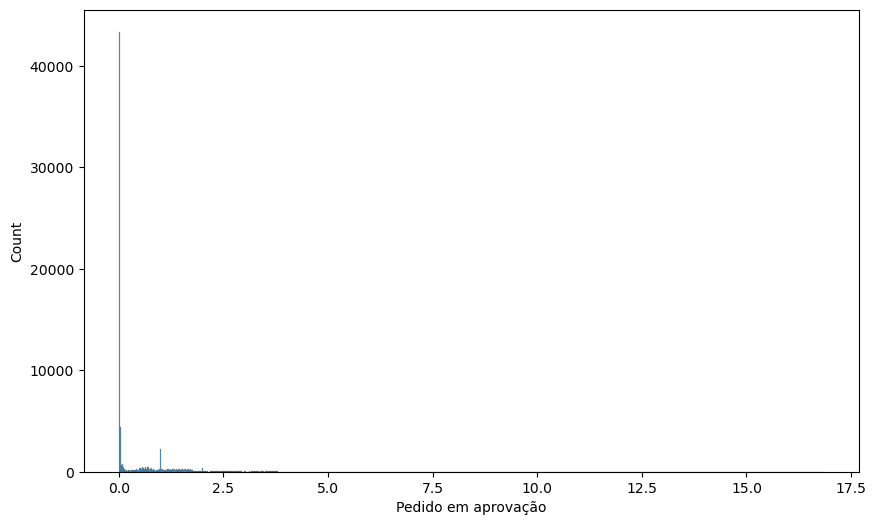

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em aprovação"])


In [54]:
df["Pedido em aprovação"].describe()

count    70771.000000
mean         0.415299
std          0.840497
min          0.000000
25%          0.010000
50%          0.010000
75%          0.550000
max         16.840000
Name: Pedido em aprovação, dtype: float64

In [55]:
out_inf,out_sup=outliers("Pedido em aprovação")

df=df[df["Pedido em aprovação"]<out_sup]
#df

Análise da coluna "Separando o pedido"

In [56]:

df["Separando o pedido"].describe()

count    62919.000000
mean         2.830786
std          2.751960
min         -0.950000
25%          1.030000
50%          2.010000
75%          3.780000
max         30.000000
Name: Separando o pedido, dtype: float64

In [57]:
df=df[df["Separando o pedido"]>0]
#df

<Axes: xlabel='Separando o pedido', ylabel='Count'>

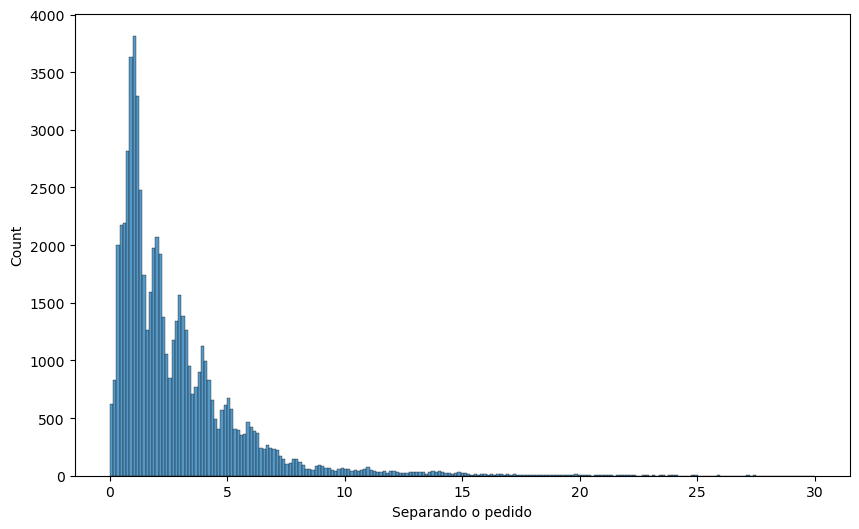

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df["Separando o pedido"])

In [59]:
df["Separando o pedido"].describe()

count    62860.000000
mean         2.833635
std          2.751664
min          0.010000
25%          1.030000
50%          2.010000
75%          3.790000
max         30.000000
Name: Separando o pedido, dtype: float64

In [60]:
out_inf,out_sup=outliers("Separando o pedido")
out_sup

7.93

In [61]:
df=df[df["Separando o pedido"]<out_sup]
#df

Analisando a coluna "Pedido em transporte"

In [62]:

df["Pedido em transporte"].describe()

count    59985.000000
mean         8.769141
std          5.902320
min         -2.890000
25%          4.410000
50%          7.260000
75%         12.050000
max         30.400000
Name: Pedido em transporte, dtype: float64

In [63]:
df=df[df["Pedido em transporte"]>0]

In [64]:
out_inf,out_sup=outliers("Pedido em transporte")
print(out_inf,out_sup)

-7.000000000000002 23.480000000000004


<Axes: xlabel='Pedido em transporte', ylabel='Count'>

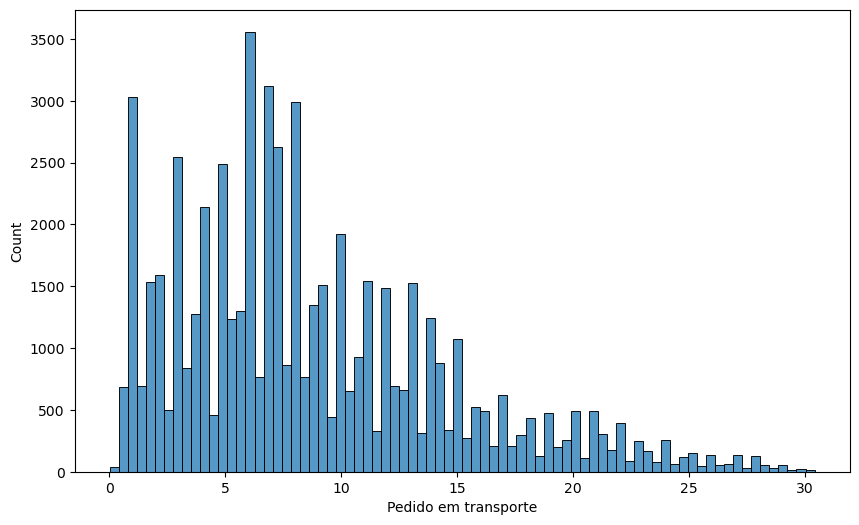

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em transporte"])

In [66]:
df=df[df["Pedido em transporte"]<out_sup]
df = df[df["Pedido em transporte"] >= 0]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Analisando um pouco a product_category_name

In [67]:
y=df["product_category_name"].value_counts()
x=y.reset_index()
x.columns=["Categoria","Contador"]
x

,Categoria,Contador
0,cama_mesa_banho,6122
1,esporte_lazer,4923
2,beleza_saude,4545
3,moveis_decoracao,3962
4,informatica_acessorios,3912
...,...,...
67,fraldas_higiene,5
68,fashion_roupa_infanto_juvenil,5
69,pc_gamer,5
70,artes_e_artesanato,2


In [68]:
categorias = df["product_category_name"].value_counts()

""" # Exibir todas as categorias de produtos
print("Categorias de Produtos:")
for categoria,valor in categorias.items():
    print(categoria,valor)
#print(categorias)
#print(categorias) """

' # Exibir todas as categorias de produtos\nprint("Categorias de Produtos:")\nfor categoria,valor in categorias.items():\n    print(categoria,valor)\n#print(categorias)\n#print(categorias) '

Categorias de Produtos:
cama_mesa_banho 6123
esporte_lazer 4924
beleza_saude 4545
relogios_presentes 2826
brinquedos 2663
cool_stuff 2602
automotivo 2115
perfumaria 2024
papelaria 1430
pet_shop 935
consoles_games 643
instrumentos_musicais 344
livros_interesse_geral 272
casa_construcao 207
market_place 205
audio 204
climatizacao 130
industria_comercio_e_negocios 116
agro_industria_e_comercio 103
livros_tecnicos 94
artigos_de_natal 72
sinalizacao_e_seguranca 52
livros_importados 25
flores 19
musica 14
cine_foto 14
artigos_de_festas 14
seguros_e_servicos 1

In [69]:
categorias

product_category_name
cama_mesa_banho                  6122
esporte_lazer                    4923
beleza_saude                     4545
moveis_decoracao                 3962
informatica_acessorios           3912
                                 ... 
fraldas_higiene                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            5
artes_e_artesanato                  2
seguros_e_servicos                  1
Name: count, Length: 72, dtype: int64

In [70]:
categorias_a_agrupar = {
    'construcao_ferramentas_ferramentas': 'construcao_ferramentas',
    'construcao_ferramentas_construcao': 'construcao_ferramentas',
    'construcao_ferramentas_jardim': 'construcao_ferramentas',
    'construcao_ferramentas_iluminacao': 'construcao_ferramentas',
    'construcao_ferramentas_seguranca': 'construcao_ferramentas',
    'ferramentas_jardim': 'construcao_ferramentas',
    'moveis_sala': 'moveis',
    'moveis_quarto': 'moveis',
    'moveis_colchao_e_estofado': 'moveis',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'moveis',
    'moveis_decoracao': 'moveis',
    'moveis_escritorio': 'moveis',
    'pc_gamer': 'pcs',
    'artes_e_artesanato':'artes',
    'telefonia_fixa':'telefonia',
    'alimentos': 'alimentos_bebidas',
    'bebidas': 'alimentos_bebidas',
    'cds_dvds_musicais': 'cds_dvds',
    'dvds_blu_ray': 'cds_dvds',
    'portateis_casa_forno_e_cafe': 'eletroportateis',
    'casa_conforto_2': 'casa_conforto',
    'eletrodomesticos_2': 'eletrodomesticos',
    'malas_acessorios':'fashion',
    'fashion_bolsas_e_acessorios':'fashion',
    'fashion_calcados':'fashion',
    'fashion_underwear_e_moda_praia':'fashion',
    'fashion_roupa_masculina':'fashion',
    'fashion_esporte':'fashion' ,
    'fashion_roupa_feminina':'fashion',
    'fashion_roupa_infanto_juvenil':'fashion',
    'eletronicos':'informatica_acessorios',
    'tablets_impressao_imagem':'informatica_acessorios',
    'la_cuisine':'utilidades_domesticas',
    'fraldas_higiene': 'bebes'
    
}

df['product_category_name'].replace(categorias_a_agrupar, inplace=True)

df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


In [71]:
#df["product_category_name"].value_counts()

In [72]:
df=df[df["product_category_name"]!="seguros_e_servicos"]
#df["product_category_name"].value_counts()

In [73]:
df["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [74]:
# Definindo o caminho para a pasta Data
current_dir = os.path.dirname(os.path.abspath('__file__'))
data_dir = os.path.join(current_dir, 'Data')


# Caminho completo para o arquivo CSV
csv_path = os.path.join(data_dir, 'Dataframelimpa_sem_latlong.csv')


# Exportando o DataFrame para um arquivo CSV
df.to_csv(csv_path, index=False)